# ギブスサンプリング
１次元正規分布からのサンプリングのみで２次元正規分布からのサンプル取得を近似する。

In [2]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [3]:
cov= np.array([[1.0, 0.6], [0.6, 1.0]])
mu = np.zeros(2)

t = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(t, t)

data = np.c_[X.ravel(), Y.ravel()]
# data = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)

Z = stats.multivariate_normal(mu, cov).pdf(data)
Z = Z.reshape(50, 50)

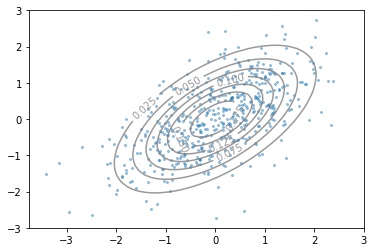

In [4]:
cont = plt.contour(X, Y, Z, colors="gray", alpha=0.8)
cont.clabel(fmt='%1.3f', fontsize=10)
rv = stats.multivariate_normal(mu, cov).rvs(500)
plt.scatter(rv[:,0], rv[:,1], s=4, alpha=0.4)

In [5]:
# return mu and sigma for the prob. dist. of a condiioned by b.
def calc_param(obs, mu_a, mu_b, var_a, var_b , cov_ab):
    mu = mu_a + cov_ab * (obs - mu_b) / var_b
    var = var_a -  cov_ab ** 2 / var_b
    return mu, np.sqrt(var)

In [6]:
random.seed(1)

# initial sample of x0
init_x0 = random.normal(scale=1.0)

# prob. dist. of x1 conditioned by x0
mu_cond, sig_cond = calc_param(init_x0, mu[1], mu[0], cov[1, 1], cov[0, 0], cov[0, 1])
# sampling x1
s = random.normal(loc=mu_cond, scale=sig_cond)

x = np.array([init_x0, s])
samples = np.array(x)

for i in range(30):
    # prob. dist. of x0 conditioned by x1
    mu_cond, sig_cond = calc_param(s, mu[0], mu[1], cov[0, 0], cov[1, 1], cov[0, 1])
    # sampling x0
    s = random.normal(loc=mu_cond, scale=sig_cond)
    x[0] = s
    samples = np.vstack([samples, x])

    # prob. dist. of x1 conditioned by x0
    mu_cond, sig_cond = calc_param(s, mu[1], mu[0], cov[1, 1], cov[0, 0], cov[0, 1])
    # sampling x1
    s = random.normal(loc=mu_cond, scale=sig_cond)
    x[1] = s
    samples = np.vstack([samples, x])

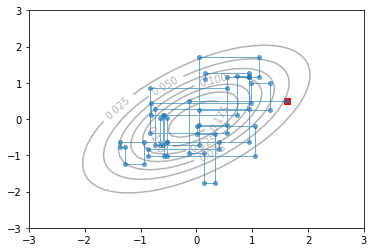

In [7]:
cont = plt.contour(X, Y, Z, colors="gray", alpha=0.6)
cont.clabel(fmt='%1.3f', fontsize=10)

plt.plot(samples[:, 0], samples[:,1], lw=1, marker="o", ms=4, alpha=0.6)
plt.scatter(samples[0,0], samples[0,1], c="r", marker="s")

### 相関が高い場合

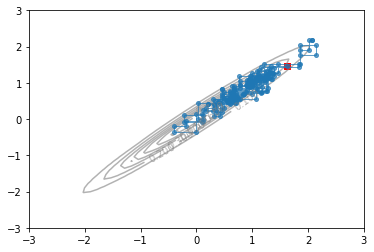

In [8]:
cov= np.array([[1.0, 0.98], [0.98, 1.0]])
mu = np.zeros(2)

t = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(t, t)

data = np.c_[X.ravel(), Y.ravel()]
# data = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)

Z = stats.multivariate_normal(mu, cov).pdf(data)
Z = Z.reshape(50, 50)


random.seed(1)

# initial sample of x0
init_x0 = random.normal(scale=1.0)

# prob. dist. of x1 conditioned by x0
mu_cond, sig_cond = calc_param(init_x0, mu[1], mu[0], cov[1, 1], cov[0, 0], cov[0, 1])
# sampling x1
s = random.normal(loc=mu_cond, scale=sig_cond)

x = np.array([init_x0, s])
samples = np.array(x)

for i in range(100):
    # prob. dist. of x0 conditioned by x1
    mu_cond, sig_cond = calc_param(s, mu[0], mu[1], cov[0, 0], cov[1, 1], cov[0, 1])
    # sampling x0
    s = random.normal(loc=mu_cond, scale=sig_cond)
    x[0] = s
    samples = np.vstack([samples, x])

    # prob. dist. of x1 conditioned by x0
    mu_cond, sig_cond = calc_param(s, mu[1], mu[0], cov[1, 1], cov[0, 0], cov[0, 1])
    # sampling x1
    s = random.normal(loc=mu_cond, scale=sig_cond)
    x[1] = s
    samples = np.vstack([samples, x])
    
    
cont = plt.contour(X, Y, Z, colors="gray", alpha=0.6)
cont.clabel(fmt='%1.3f', fontsize=10)

plt.plot(samples[:, 0], samples[:,1], lw=1, marker="o", ms=4, alpha=0.7)
plt.scatter(samples[0,0], samples[0,1], c="r", marker="s")

## 変分推論
平均場近似

# ポアソン混合モデル
ギブスサンプリング

# ガウス混合モデル

In [ ]:
# 変分推論


In [141]:
samples

array([[ 1.62434536,  0.48520209],
       [-0.13141615,  0.48520209],
       [-0.13141615, -0.93722459]])

In [112]:
x.copy()

array([-0.13141615,  0.48520209])

In [91]:
# 条件付き分布からサンプリング
# x0が観測されたとして、x1の条件付き分布を算出
mu1 = mu[1] + cov[0, 1] * (sample - mu[0]) / cov[0, 0]
sig1 = cov[1, 1] - cov[0, 1] ** 2 / cov[0, 0]

sample2 = random.normal(loc=mu1, scale=sig1)



In [98]:
s

-0.8410709645096137

In [75]:
sample, mu1, sig1

(1.6243453636632417, 0.97460721819794494, 0.64000000000000001)

In [31]:
np.concatenate([X.ravel(), Y.ravel()], axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1